### Student Information
Name: 鄭幸怡

Student ID: 109062305

GitHub ID: provomittt

Kaggle name: syiz

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## First Part

In [41]:
### Begin Assignment Here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import helpers.data_mining_helpers as dmh
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import keras

In [42]:
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.text:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D


In [43]:
### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [44]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [45]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [46]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [47]:
# my functions
# import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X_train = pd.DataFrame.from_records(format_rows(train_df), columns= ['text'])
Y_train = pd.DataFrame.from_records(train_df, columns= ['emotion', 'intensity']).sort_index(ascending=True)

X_test = pd.DataFrame.from_records(format_rows(test_df), columns= ['text'])
Y_test = pd.DataFrame.from_records(test_df, columns= ['emotion', 'intensity']).sort_index(ascending=True)


/var/folders/lr/zx9plpdj28qgtkpt9r2x_jf00000gn/T/ipykernel_2578/712928977.py:6: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  Y_train = pd.DataFrame.from_records(train_df, columns= ['emotion', 'intensity']).sort_index(ascending=True)
/var/folders/lr/zx9plpdj28qgtkpt9r2x_jf00000gn/T/ipykernel_2578/712928977.py:9: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  Y_test = pd.DataFrame.from_records(test_df, columns= ['emotion', 'intensity']).sort_index(ascending=True)


In [48]:
X_train

,text
0,@NHLstoreNYC I'm cheering for @TeamNA_WCH and ...
1,@DanLanthier That was exhilarating hockey. The...
2,@ReserveHinata tend to them he's going to get ...
3,Did you know I specialise in #anxiety and #pa...
4,That way ur so angry you can literally feel ur...
...,...
3608,#LMFAO @MSNBC 's #racepimp Tamron Hall used th...
3609,@ajjaffe @MattMurph24 @nickspencer I was under...
3610,It's never the end / When the moment is dire. ...
3611,Had a great time at Skywalkers open gym tonigh...


In [49]:
Y_train

,emotion,intensity
0,anger,0.938
1,anger,0.896
2,anger,0.896
3,anger,0.896
4,anger,0.896
...,...,...
3608,sadness,0.104
3609,sadness,0.104
3610,sadness,0.088
3611,sadness,0.083


In [50]:
train_df

,id,text,emotion,intensity
2314,30310,@NHLstoreNYC I'm cheering for @TeamNA_WCH and ...,joy,0.560
2556,30552,@DanLanthier That was exhilarating hockey. The...,joy,0.396
3237,40410,@ReserveHinata tend to them he's going to get ...,sadness,0.475
1640,20783,Did you know I specialise in #anxiety and #pa...,fear,0.396
53,10053,That way ur so angry you can literally feel ur...,anger,0.750
...,...,...,...,...
2389,30385,#LMFAO @MSNBC 's #racepimp Tamron Hall used th...,joy,0.500
1253,20396,@ajjaffe @MattMurph24 @nickspencer I was under...,fear,0.562
1623,20766,It's never the end / When the moment is dire. ...,fear,0.396
2083,30079,Had a great time at Skywalkers open gym tonigh...,joy,0.780


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy


def countAndPlotWordOccurance(df, title):
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
    # src: https://stackoverflow.com/questions/20612769/how-to-get-sum-of-each-row-and-sum-of-each-column-in-scipy-sparse-matrices-csr
    # https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
    b = scipy.sparse.csr_matrix(df_counts[:, :].toarray())
    B = (b.sum(axis=0)).A[0]
    # print(B) # B: the frequency of each word
    # type(B)
    ind = B.argsort()[-30:][::-1]
    plot_x = [str(i) for i in count_vect.get_feature_names_out()[ind]]
    # print(plot_x)
    plot_y = [i for i in list(B[ind])]
    # print(plot_y)
    df_toplot = pd.DataFrame(
        {'term': plot_x,
        'frequency':plot_y}
    )
    plt.subplots(figsize=(20, 7))
    plt.title(f'Top 30 terms in {title} before analyze()')
    sns.barplot(df_toplot, x='term', y='frequency')

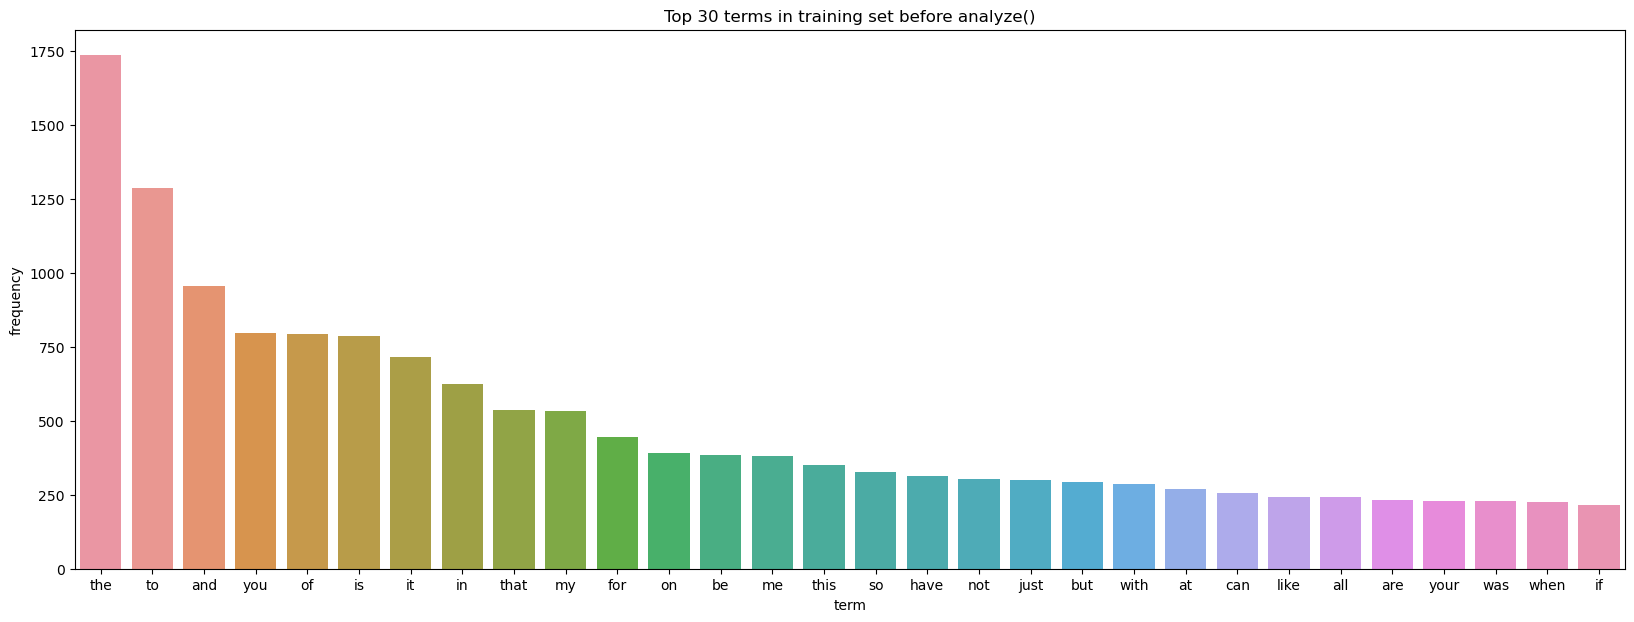

In [52]:
countAndPlotWordOccurance(X_train, 'training set')

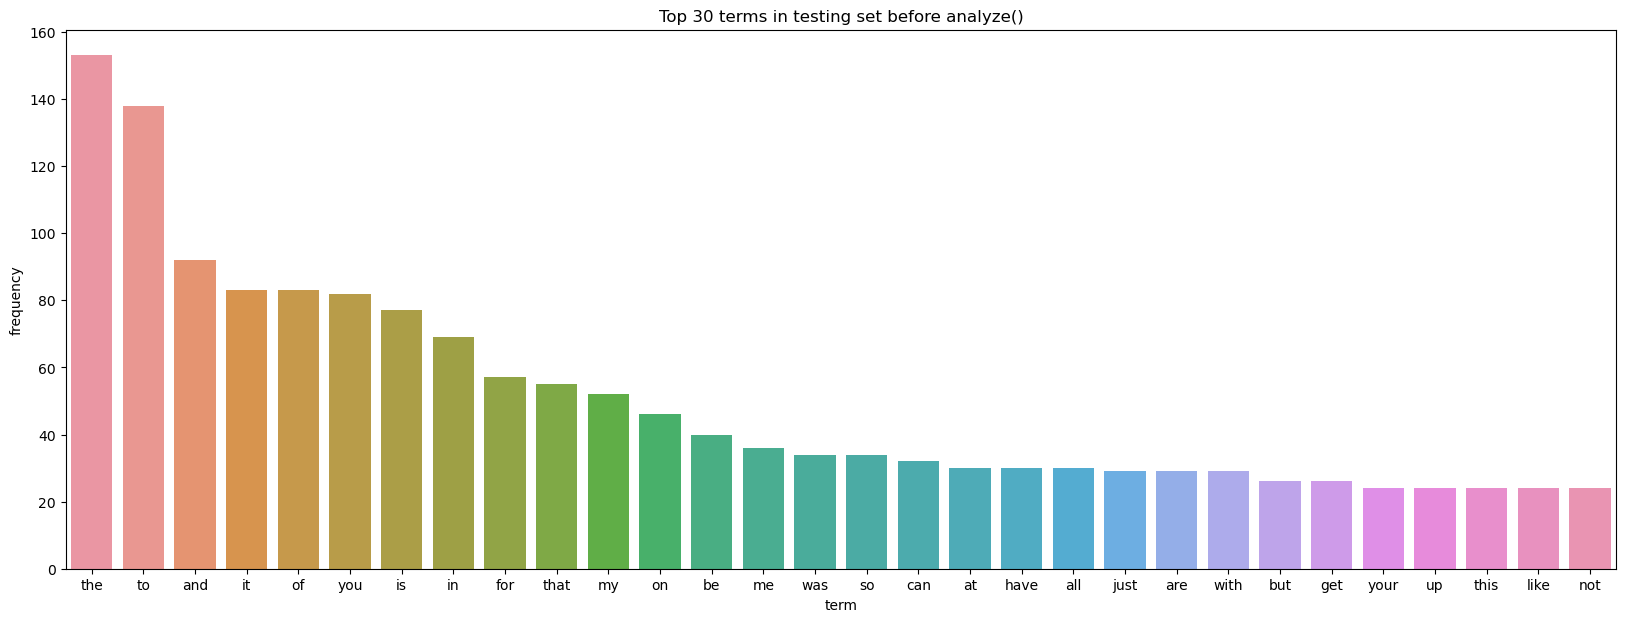

In [53]:
countAndPlotWordOccurance(X_test, 'testing set')

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [54]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
tf_vectorizer = TfidfVectorizer(
        max_features=1000,
        tokenizer=nltk.word_tokenize
    )
tf_vectorizer.fit(train_df['text'])
X_tf = tf_vectorizer.transform(train_df['text'])
feature_names_1000 = tf_vectorizer.get_feature_names_out()
feature_names_1000[100:110]

/Users/zhengxingyi/miniconda3/envs/DM/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [55]:
# Answer here
'''
Training result: training accuracy: 0.99, testing accuracy: 0.68
We can see that there might be #!overfitting, 
since the accuracy on training set is high, 
and the accuracy on testing set is low.

In the confusion matrix, we can see that how the wrong result is distributed.
'''

'\nTraining result: training accuracy: 0.99, testing accuracy: 0.68\nWe can see that there might be #!overfitting, \nsince the accuracy on training set is high, \nand the accuracy on testing set is low.\n\nIn the confusion matrix, we can see that how the wrong result is distributed.\n'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [56]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [57]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [58]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


In [59]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
nb_clf = MultinomialNB(force_alpha=True)
nb_clf.fit(X_train, y_train)

## predict!
y_train_pred = nb_clf.predict(X_train)
y_test_pred = nb_clf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



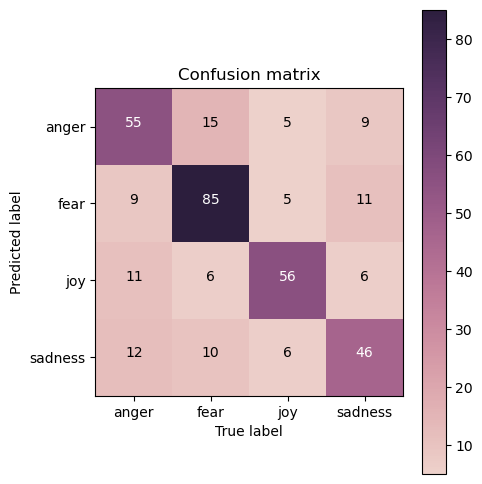

'\nThe accuracy is a little bit higher compared to using DT\n'

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
'''
The accuracy is a little bit higher compared to using DT
'''

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [61]:
# Answer here
'''
In the result, we can see that though Decision tree can achieve acc=0.99 in training set,
the accuracy on testing set (acc=0.68) is lower compared to naive bayes (acc=0.7).
The result shows that the decision tree model overfits on the training set.

Decision tree model's goal is to minimize the entropy of the whole dataset.
However, in the previous model setting, the max depth of the decision tree is not set,
making it more likly to overfit the training set.

On the other hand, Naive Bayes model is more simple.
It assumes the probability are independence among all the features, making it less complex,
and less likely to capture noise in the training data.
As a result, it may generalize better to unseen data.

'''

"\nIn the result, we can see that though Decision tree can achieve acc=0.99 in training set,\nthe accuracy on testing set (acc=0.68) is lower compared to naive bayes (acc=0.7).\nThe result shows that the decision tree model overfits on the training set.\n\nDecision tree model's goal is to minimize the entropy of the whole dataset.\nHowever, in the previous model setting, the max depth of the decision tree is not set,\nmaking it more likly to overfit the training set.\n\nOn the other hand, Naive Bayes model is more simple.\nIt assumes the probability are independence among all the features, making it less complex,\nand less likely to capture noise in the training data.\nAs a result, it may generalize better to unseen data.\n\n"

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [62]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [63]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2314        joy
2556        joy
3237    sadness
1640       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [64]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [65]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [66]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2023-12-27 17:39:04.341189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [3613,3]
	 [[{{node Placeholder/_0}}]]
2023-12-27 17:39:04.341997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3613,4]
	 [[{{node Placeholder/_1}}]]


 94/113 [=======================>......] - ETA: 0s - loss: 1.3479 - accuracy: 0.3361

2023-12-27 17:39:05.738119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [347,4]
	 [[{{node Placeholder/_1}}]]


113/113 [==============================] - 2s 4ms/step - loss: 1.3322 - accuracy: 0.3518 - val_loss: 1.2751 - val_accuracy: 0.3919
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.6330 - val_loss: 0.9001 - val_accuracy: 0.6427
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7924 - val_loss: 0.7625 - val_accuracy: 0.7089
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8533 - val_loss: 0.7439 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8893 - val_loss: 0.7971 - val_accuracy: 0.6974
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9092 - val_loss: 0.8547 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9291 - val_loss: 0.8920 - val_accuracy: 0.6801
Epoch 8/25
113/11

In [56]:
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")

<Axes: xlabel='epoch'>

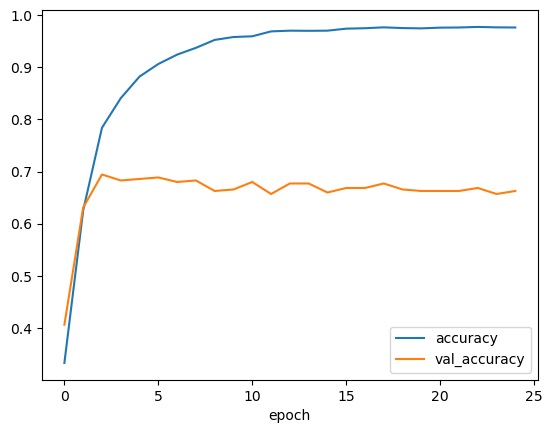

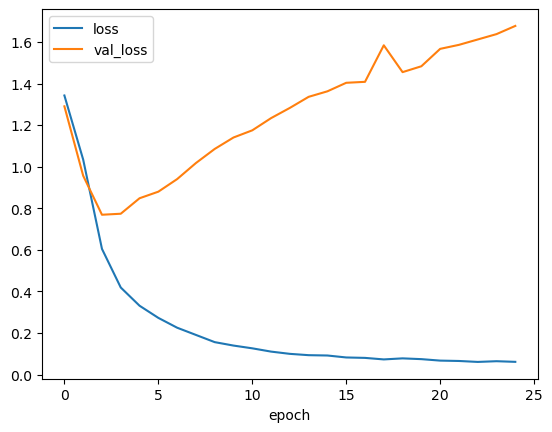

In [58]:
# Answer here
training_log.plot('epoch', ['accuracy', 'val_accuracy'])
training_log.plot('epoch', ['loss', 'val_loss'])

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
'''
Averaging the vectors of individual words in a sentence is a simple way to represent a sentence data.
By averaging the word vectors, we can capture the overall context and semantics of the sentence.
However, the order imformation is loss after this kind of calculation.
'''

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [59]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [62]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def printSimilarWordstSNE(word_list, topn):
    target_words = []
    for i in range(len(word_list)):
        words = [word_list[i]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[i], topn=topn)]
        target_words += words

    cn = topn + 1
    color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
    ## w2v model
    model = w2v_google_model

    ## prepare training word vectors
    size = 200
    target_size = len(target_words)
    all_word = list(model.index_to_key)
    word_train = target_words + all_word[:size]
    X_train = model[word_train]

    ## t-SNE model
    tsne = TSNE(n_components=2, metric='cosine', random_state=28)

    ## training
    X_tsne = tsne.fit_transform(X_train)

    ## plot the result
    plt.figure(figsize=(7.5, 7.5), dpi=115)
    plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
    for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
        plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
    # plt.legend()
    plt.show()
        


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


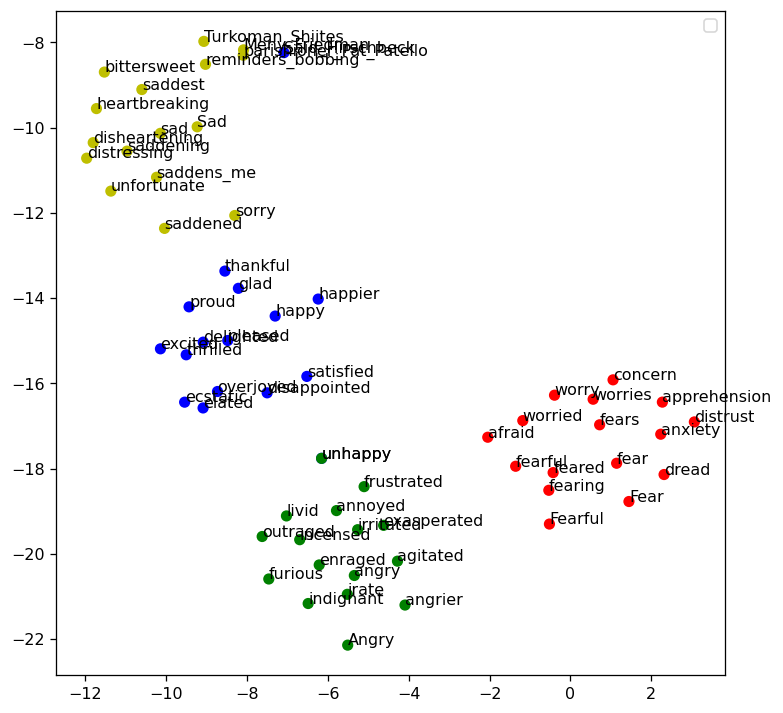

In [63]:
word_list = ['happy', 'angry', 'fear', 'sad']

topn = 15

printSimilarWordstSNE(word_list, topn)

## Part 2

### Preprocessing
- generating train.csv and test.csv

In [23]:
import json
import csv
from tqdm import tqdm, trange
import string
def extract_tweet_info(json_file_path, length=10, stop=True):
    tweet_info_list = []
    i=0
    with open(json_file_path, 'r', encoding='utf-8') as file:
        print("Finish loading file...")
        # Iterate through each line in the file
        for line in tqdm(file):
            data = json.loads(line)
            # Assuming the JSON structure follows the provided format
            tweet_data = data.get('_source', {}).get('tweet', {})
            
            if tweet_data:
                tweet_id = tweet_data.get('tweet_id', '')
                text = tweet_data.get('text', '').replace('\n','').replace('\r','').replace('<LH>','').translate(str.maketrans('', '', string.punctuation))
                tweet_info = [tweet_id, text]
                # tweet_info_list.append({'tweet_id': tweet_id, 'text': text})
                tweet_info_list.append(tweet_info)
            i += 1
            if stop is True and (i>length):
                break
            # break
    return tweet_info_list


In [24]:
json_file_path = '../dm2023-isa5810-lab2-homework/tweets_DM.json'
header = ['tweet_id', 'text']
tweet_info_list = extract_tweet_info(json_file_path, length=1867534, stop=False)
# tweet_info_list = extract_tweet_info(json_file_path, length=1867534)

# print(tweet_info_list)
with open('tweets_DM.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    for tweet_info in tweet_info_list:
        writer.writerow(tweet_info)

Finish loading file...


1867535it [00:28, 65195.12it/s]


In [3]:
import pandas as pd

# Example usage:
tweet_text_file = '../dm2023-isa5810-lab2-homework/tweets_DM.csv'
emotion_label_file = '../dm2023-isa5810-lab2-homework/emotion.csv'
identification_label_file = '../dm2023-isa5810-lab2-homework/data_identification.csv'
train_csv_path = '../dm2023-isa5810-lab2-homework/train.csv'
test_csv_path = '../dm2023-isa5810-lab2-homework/test.csv'
train_pkl_path = '../dm2023-isa5810-lab2-homework/train.pkl'
test_pkl_path = '../dm2023-isa5810-lab2-homework/test.pkl'
# Read tweet data from files
def read_tweet_data(file_path):
    return pd.read_csv(file_path, dtype=str)

# Merge dataframes and save as CSV
def generate_train_test_csv(tweet_text_file, emotion_label_file, identification_label_file, train_csv_path, test_csv_path):
    # Read tweet text data
    tweet_text_df = read_tweet_data(tweet_text_file)

    # Read emotion label data
    emotion_label_df = read_tweet_data(emotion_label_file)

    # Read identification label data
    identification_label_df = read_tweet_data(identification_label_file)

    # Merge dataframes based on tweet_id
    merged_df = pd.merge(tweet_text_df, emotion_label_df, on='tweet_id', how='left')
    merged_df = pd.merge(merged_df, identification_label_df, on='tweet_id', how='left')

    # Separate into train and test dataframes
    train_df = merged_df[merged_df['identification'] == 'train'][['tweet_id', 'emotion', 'text']]
    test_df = merged_df[merged_df['identification'] == 'test'][['tweet_id', 'text']]

    # Save to CSV
    # train_df.to_csv(train_csv_path, index=False)
    # test_df.to_csv(test_csv_path, index=False)
    train_df.to_pickle(train_pkl_path) 
    test_df.to_pickle(test_pkl_path)

# generate_train_test_csv(tweet_text_file, emotion_label_file, identification_label_file, train_csv_path, test_csv_path)


In [1]:
### Begin Assignment Here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import helpers.data_mining_helpers as dmh
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import keras
import numpy as np

2023-12-27 02:24:18.734489: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## load a pickle file
train_pkl_path = '../dm2023-isa5810-lab2-homework/train.pkl'
test_pkl_path = '../dm2023-isa5810-lab2-homework/test.pkl'
train_df = pd.read_pickle(train_pkl_path)
test_df = pd.read_pickle(test_pkl_path)

In [32]:
train_df['emotion'].unique()

array(['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust',
       'disgust', 'surprise'], dtype=object)

In [3]:
emotion_list = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise']

In [4]:
# Filter rows where emotion is 'joy'
joy_rows = train_df[train_df['emotion'] == 'joy']

# Calculate the number of rows to drop (half of the joy rows)
rows_to_drop = len(joy_rows) // 2

# Drop half of the rows where emotion is 'joy'
df_filtered = train_df.drop(joy_rows.sample(n=rows_to_drop).index)

In [27]:
def plotDistribution(df):
    labels = df['emotion'].unique()
    post_total = len(df)
    df1 = df.groupby(['emotion']).count()['text']
    df1 = df1.apply(lambda x: round(x*100/post_total,3))

    #plot
    fig, ax = plt.subplots(figsize=(9,3))
    plt.bar(df1.index,df1.values)

    #arrange
    plt.ylabel('% of instances')
    plt.xlabel('Emotion')
    plt.title('Emotion distribution')
    plt.grid(True)
    plt.show()

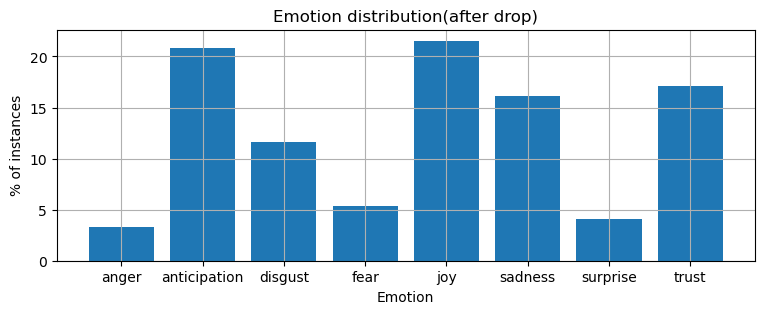

In [6]:
labels = df_filtered['emotion'].unique()
post_total = len(df_filtered)
df1 = df_filtered.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(9,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution(after drop)')
plt.grid(True)
plt.show()